In [1]:
import trips
import tweetdf
import importlib

In [2]:
tweets = tweetdf.from_csv("./../../dbs/Sweden-short.csv")


In [5]:
tweets.groupby('userid').size()

userid
792370        506
806842        150
1227871       472
1503691       346
1723131        84
             ... 
964175814       1
1003834447      3
1024872276      1
1062886562      1
1063153340      2
Length: 939, dtype: int64

In [6]:
usertweets = tweets[tweets.userid == 792370]

In [12]:
importlib.reload(trips)
tr = trips.from_dfs(usertweets)


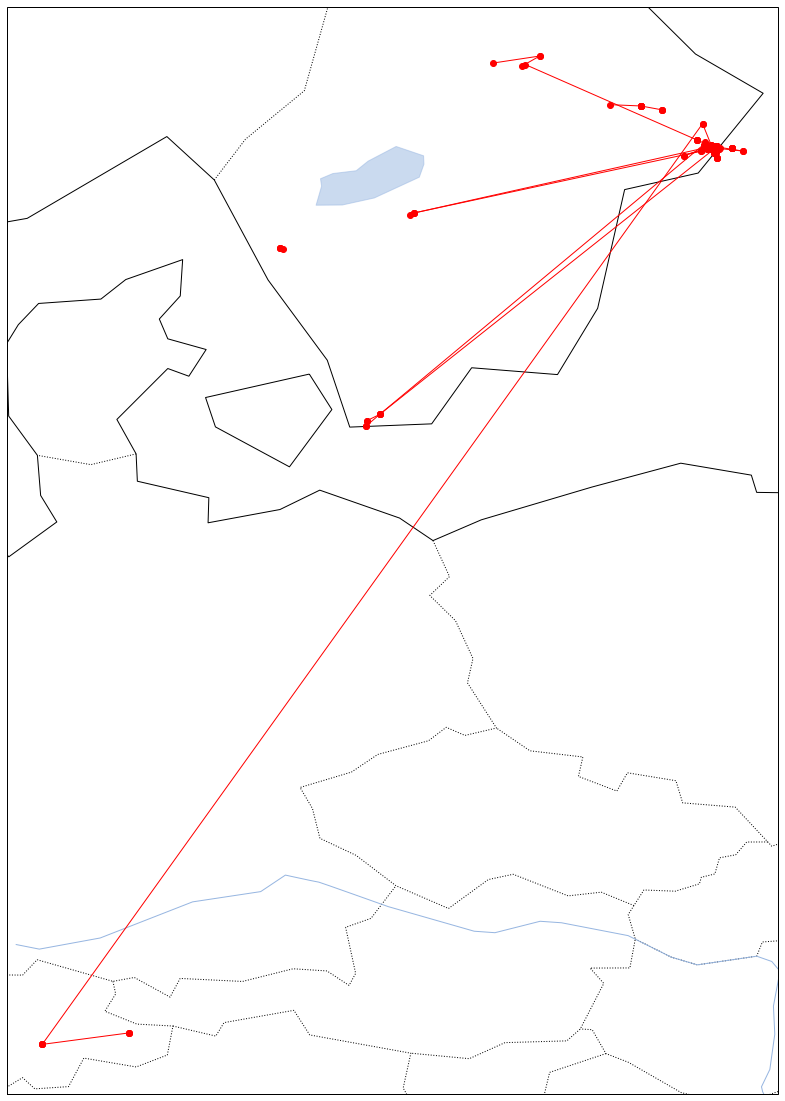

In [13]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
# ax.stock_img()
#ax.set_global()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
for _, row in tr.iterrows():
    ax.plot([row.longitude_o,row.longitude_d], [row.latitude_o, row.latitude_d], linewidth=1, marker='o', color='red', transform=ccrs.PlateCarree())
plt.show()
